In [38]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
%matplotlib inline

In [5]:
f_birth = pd.read_csv('daily-total-female-births-in-cal.csv',index_col=[0], parse_dates=[0])

In [6]:
f_birth.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [7]:
f_birth.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50
Daily total female births in California,1959


In [8]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,366.000000
mean,47.218579
std,100.472534
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,1959.000000


In [14]:
#modifing the dataset by ejecting last row
f_birth = f_birth[0:365]

In [15]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<AxesSubplot:xlabel='Date'>

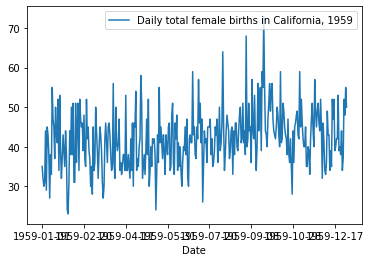

In [16]:
f_birth.plot()

In [ ]:
# smoothing the cureve by putting average values for a fixed window
#to see the trend
#moving average
f_birth_mean = f_birth.rolling(window =20).mean()

<AxesSubplot:xlabel='Date'>

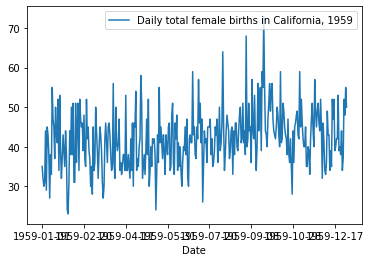

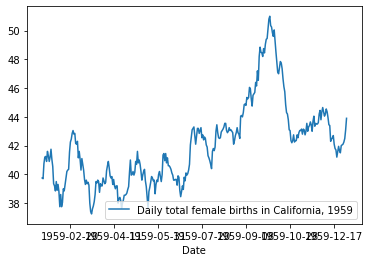

In [19]:
f_birth.plot()
f_birth_mean.plot()

# BASELINE MODEL

In [ ]:
#series vs data frame (Converting dataframe in to series)
#for knwoledge
#help to create the baseline model
series_value = f_birth.values

In [34]:
values = pd.DataFrame(series_value)

In [35]:
birth_df = pd.concat([values,values.shift(1)],axis=1)

In [36]:
birth_df.columns = ["Actual_birth","Forcast_birth"]

In [37]:
birth_df.head()

,Actual_birth,Forcast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [39]:
birth_test = birth_df[1:]

In [40]:
birth_test.head()

,Actual_birth,Forcast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [42]:
birth_test.tail()

,Actual_birth,Forcast_birth
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [41]:
birth_error = mean_squared_error(birth_test.Actual_birth,birth_test.Forcast_birth)

In [43]:
np.sqrt(birth_error)

9.177283229394606

# ARIMA - Autoregressive (P) Integrated (d) Moving Average (q)

In [44]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

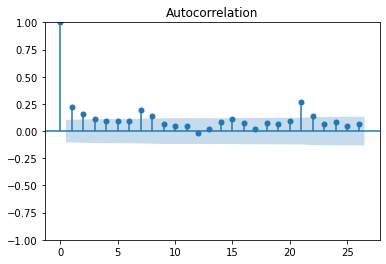

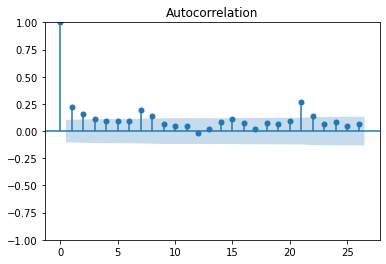

In [45]:
#plot_acf is to identify Q
plot_acf(f_birth)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


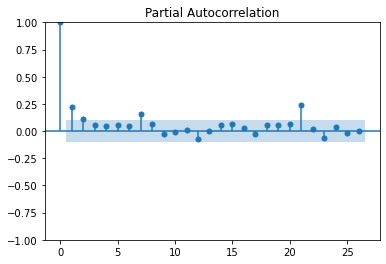

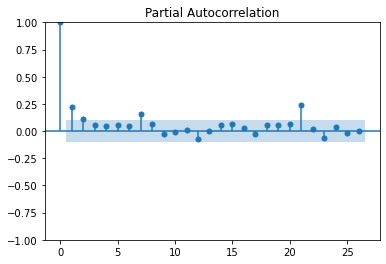

In [46]:
#To identify the value of p
plot_pacf(f_birth)

In [47]:
#Splitting training and testng data
birth_train = f_birth[0:330]
birth_test = f_birth[330:365]

In [48]:
birth_train.size

330

In [49]:
birth_test.size

35

In [54]:
#calling the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [71]:
birth_model_1 = ARIMA(birth_train, order=(2,1,3))
birth_model_2 = ARIMA(birth_train, order=(2,1,1))
birth_model_3 = ARIMA(birth_train, order=(2,1,2))
birth_model_4 = ARIMA(birth_train, order=(1,1,1))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

In [73]:
birth_model_fit_1 = birth_model_1.fit()
birth_model_fit_2 = birth_model_2.fit()
birth_model_fit_3 = birth_model_3.fit()
birth_model_fit_4 = birth_model_4.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [75]:
#aic is a parameter that checks the model accurecy
birth_model_fit_1.aic

2229.85216214129

In [76]:
#aic is a parameter that checks the model accurecy
birth_model_fit_2.aic

2229.5119048771276

In [77]:
#aic is a parameter that checks the model accurecy
birth_model_fit_3.aic

2231.485603126459

In [78]:
#aic is a parameter that checks the model accurecy
birth_model_fit_4.aic

2228.0930224380127

In [83]:
birth_forecast_4 = birth_model_fit_4.forecast(steps = 35)
birth_forecast_3 = birth_model_fit_3.forecast(steps = 35)  
birth_forecast_2 = birth_model_fit_2.forecast(steps = 35)  
birth_forecast_1 = birth_model_fit_1.forecast(steps = 35)  

In [84]:
birth_forecast_4

1959-11-27    44.948175
1959-11-28    44.503403
1959-11-29    44.454580
1959-11-30    44.449221
1959-12-01    44.448633
1959-12-02    44.448568
1959-12-03    44.448561
1959-12-04    44.448560
1959-12-05    44.448560
1959-12-06    44.448560
1959-12-07    44.448560
1959-12-08    44.448560
1959-12-09    44.448560
1959-12-10    44.448560
1959-12-11    44.448560
1959-12-12    44.448560
1959-12-13    44.448560
1959-12-14    44.448560
1959-12-15    44.448560
1959-12-16    44.448560
1959-12-17    44.448560
1959-12-18    44.448560
1959-12-19    44.448560
1959-12-20    44.448560
1959-12-21    44.448560
1959-12-22    44.448560
1959-12-23    44.448560
1959-12-24    44.448560
1959-12-25    44.448560
1959-12-26    44.448560
1959-12-27    44.448560
1959-12-28    44.448560
1959-12-29    44.448560
1959-12-30    44.448560
1959-12-31    44.448560
Freq: D, Name: predicted_mean, dtype: float64

In [66]:
birth_test

,"Daily total female births in California, 1959"
Date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [85]:
np.sqrt(mean_squared_error(birth_test,birth_forecast_1))

6.664545092449518

In [86]:
np.sqrt(mean_squared_error(birth_test,birth_forecast_2))

6.665915229799631

In [87]:
np.sqrt(mean_squared_error(birth_test,birth_forecast_3))

6.666249894165663

In [88]:
np.sqrt(mean_squared_error(birth_test,birth_forecast_4))

6.661571736954111

# Conclusion: ARIMA model is better that Base line model(Lower mean square error)